In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

Using Theano backend.


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
# the names will be the names of each column in our pandas DataFrame
names = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [5]:
#print the shape of the DataFrame, so we can see how many examples # have
print('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [6]:
#print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [7]:
#remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [8]:
#drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [10]:
#print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [11]:
#print data characteristics using panda built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


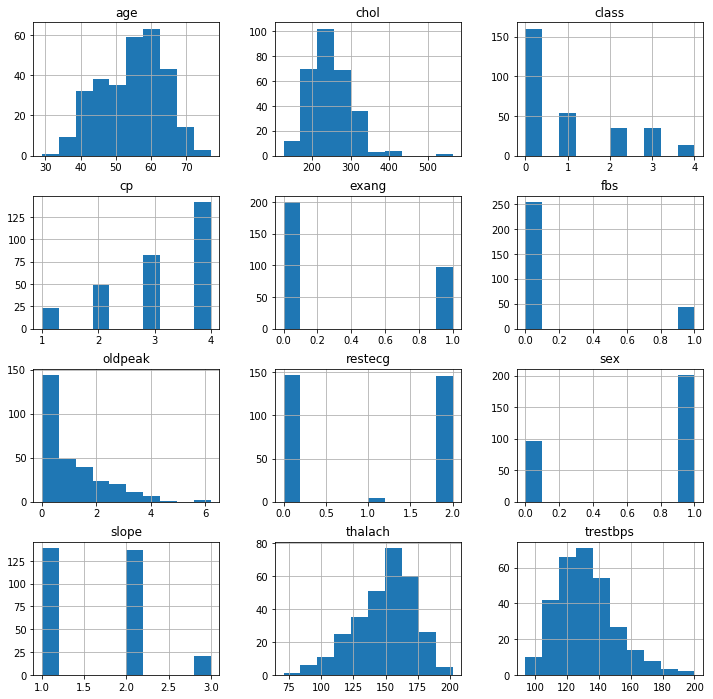

In [12]:
#plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [13]:
#create X and Y datasets for training
from sklearn import model_selection

X =  np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [14]:
#convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes = None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    #create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    #compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
#fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 135us/step - loss: 1.2751 - acc: 0.5527
Epoch 2/100
237/237 [==============================] - 0s 97us/step - loss: 1.2320 - acc: 0.5485
Epoch 3/100
237/237 [==============================] - 0s 95us/step - loss: 1.2064 - acc: 0.5527
Epoch 4/100
237/237 [==============================] - 0s 116us/step - loss: 1.1817 - acc: 0.5570
Epoch 5/100
237/237 [==============================] - 0s 97us/step - loss: 1.1722 - acc: 0.5654
Epoch 6/100
237/237 [==============================] - 0s 94us/step - loss: 1.1545 - acc: 0.5612
Epoch 7/100
237/237 [==============================] - 0s 114us/step - loss: 1.1346 - acc: 0.5781
Epoch 8/100
237/237 [==============================] - 0s 124us/step - loss: 1.1292 - acc: 0.5654
Epoch 9/100
237/237 [==============================] - 0s 132us/step - loss: 1.1270 - acc: 0.5654
Epoch 10/100
237/237 [==============================] - 0s 135us/step - loss: 1.1026 - acc: 0.5738
Epoch 11/100
237/237 [=

237/237 [==============================] - 0s 95us/step - loss: 0.8875 - acc: 0.6245
Epoch 85/100
237/237 [==============================] - 0s 78us/step - loss: 0.8979 - acc: 0.6329
Epoch 86/100
237/237 [==============================] - 0s 88us/step - loss: 0.8652 - acc: 0.6498
Epoch 87/100
237/237 [==============================] - 0s 93us/step - loss: 0.8660 - acc: 0.6456
Epoch 88/100
237/237 [==============================] - 0s 110us/step - loss: 0.8744 - acc: 0.6287
Epoch 89/100
237/237 [==============================] - 0s 121us/step - loss: 0.8878 - acc: 0.6245
Epoch 90/100
237/237 [==============================] - 0s 134us/step - loss: 0.8858 - acc: 0.6456
Epoch 91/100
237/237 [==============================] - 0s 97us/step - loss: 0.8982 - acc: 0.6456
Epoch 92/100
237/237 [==============================] - 0s 102us/step - loss: 0.8671 - acc: 0.6624
Epoch 93/100
237/237 [==============================] - 0s 80us/step - loss: 0.8801 - acc: 0.6414
Epoch 94/100
237/237 [=======

In [17]:
#convert into binary classification problem - heart disease or not heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0]  = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0]


In [18]:
def create_binary_model():
    #create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
237/237 [==============================] - 0s 97us/step - loss: 0.7203 - acc: 0.4515
Epoch 2/100
237/237 [==============================] - 0s 79us/step - loss: 0.6845 - acc: 0.5105
Epoch 3/100
237/237 [==============================] - 0s 88us/step - loss: 0.6845 - acc: 0.6034
Epoch 4/100
237/237 [==============================] - 0s 102us/step - loss: 0.6761 - acc: 0.6498
Epoch 5/100
237/237 [==============================] - 0s 74us/step - loss: 0.6730 - acc: 0.6160
Epoch 6/100
237/237 [==============================] - 0s 105us/step - loss: 0.6661 - acc: 0.6540
Epoch 7/100
237/237 [==============================] - 0s 133us/step - loss: 0.6553 - acc: 0.6287
Epoch 8/100
237/237 [==============================] - 0s 109us/step - loss: 0.6475 - acc: 0.6878
Epoch 9/100
237/237 [==============================] - 0s 124us/step - loss: 0.6370 - acc: 0.7004
Epoch 10/100
237/237 [==============================] - 0s 170us/step - loss: 0.6286 - acc: 0.7004
Epoch 11/100
237/237 [=

237/237 [==============================] - 0s 114us/step - loss: 0.3477 - acc: 0.8650
Epoch 85/100
237/237 [==============================] - 0s 128us/step - loss: 0.3533 - acc: 0.8650
Epoch 86/100
237/237 [==============================] - 0s 122us/step - loss: 0.3525 - acc: 0.8439
Epoch 87/100
237/237 [==============================] - 0s 132us/step - loss: 0.3404 - acc: 0.8692
Epoch 88/100
237/237 [==============================] - 0s 139us/step - loss: 0.3618 - acc: 0.8565
Epoch 89/100
237/237 [==============================] - 0s 132us/step - loss: 0.3610 - acc: 0.8439
Epoch 90/100
237/237 [==============================] - 0s 106us/step - loss: 0.3512 - acc: 0.8734
Epoch 91/100
237/237 [==============================] - 0s 114us/step - loss: 0.3617 - acc: 0.8650
Epoch 92/100
237/237 [==============================] - 0s 89us/step - loss: 0.3656 - acc: 0.8439
Epoch 93/100
237/237 [==============================] - 0s 93us/step - loss: 0.3834 - acc: 0.8439
Epoch 94/100
237/237 [===

In [24]:
#generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = model.predict(X_test)

In [22]:
categorical_pred = model.predict(X_test)

In [25]:
categorical_pred

array([[4.96999845e-02, 1.93856388e-01, 3.28052878e-01, 2.95993805e-01,
        1.32396936e-01],
       [5.37999749e-01, 2.98910767e-01, 6.61438182e-02, 6.91769943e-02,
        2.77686957e-02],
       [9.65161324e-02, 2.21646890e-01, 2.90294528e-01, 2.45724589e-01,
        1.45817861e-01],
       [9.28309023e-01, 6.83996677e-02, 1.36813195e-03, 1.48185471e-03,
        4.41347220e-04],
       [9.77942109e-01, 2.17814595e-02, 1.13045600e-04, 1.29614593e-04,
        3.37838792e-05],
       [5.83663993e-02, 2.05317736e-01, 2.84959733e-01, 3.32315832e-01,
        1.19040295e-01],
       [8.44547510e-01, 1.41172081e-01, 5.85771305e-03, 6.66880002e-03,
        1.75389100e-03],
       [6.31666631e-02, 2.05220267e-01, 2.82604814e-01, 3.24153453e-01,
        1.24854788e-01],
       [4.45142895e-01, 3.34381312e-01, 9.70335752e-02, 8.66925791e-02,
        3.67496386e-02],
       [9.35954452e-01, 6.16325922e-02, 1.00452662e-03, 1.10599026e-03,
        3.02413711e-04],
       [6.35576993e-02, 2.0762

In [26]:
#generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.5666666666666667
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        30
           1       0.20      0.08      0.12        12
           2       0.14      0.12      0.13         8
           3       0.40      0.57      0.47         7
           4       0.00      0.00      0.00         3

   micro avg       0.57      0.57      0.57        60
   macro avg       0.30      0.34      0.31        60
weighted avg       0.47      0.57      0.51        60



C:\Users\Malcolm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.7666666666666667
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.83      0.78        30

   micro avg       0.77      0.77      0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

